In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_from_db(query, db_file="cricket_data.db"):
    
    try:
        conn = sqlite3.connect(db_file)
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error connecting to the database or running query: {e}")
        return pd.DataFrame()
    finally:
        if conn:
            conn.close()


sns.set_style("whitegrid")

In [5]:

def plot_bar_chart(df, x_col, y_col, title, x_label, y_label, figsize=(12, 8), palette="viridis"):
    
    plt.figure(figsize=figsize)
    
    ax = sns.barplot(x=x_col, y=y_col, data=df, palette=palette, hue=y_col, legend=False)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

    plt.tight_layout()
    plt.show()

def plot_pie_chart(df, labels_col, values_col, title, figsize=(10, 10)):
    
    plt.figure(figsize=figsize)
    plt.pie(df[values_col], labels=df[labels_col], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(title, fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.show()
    

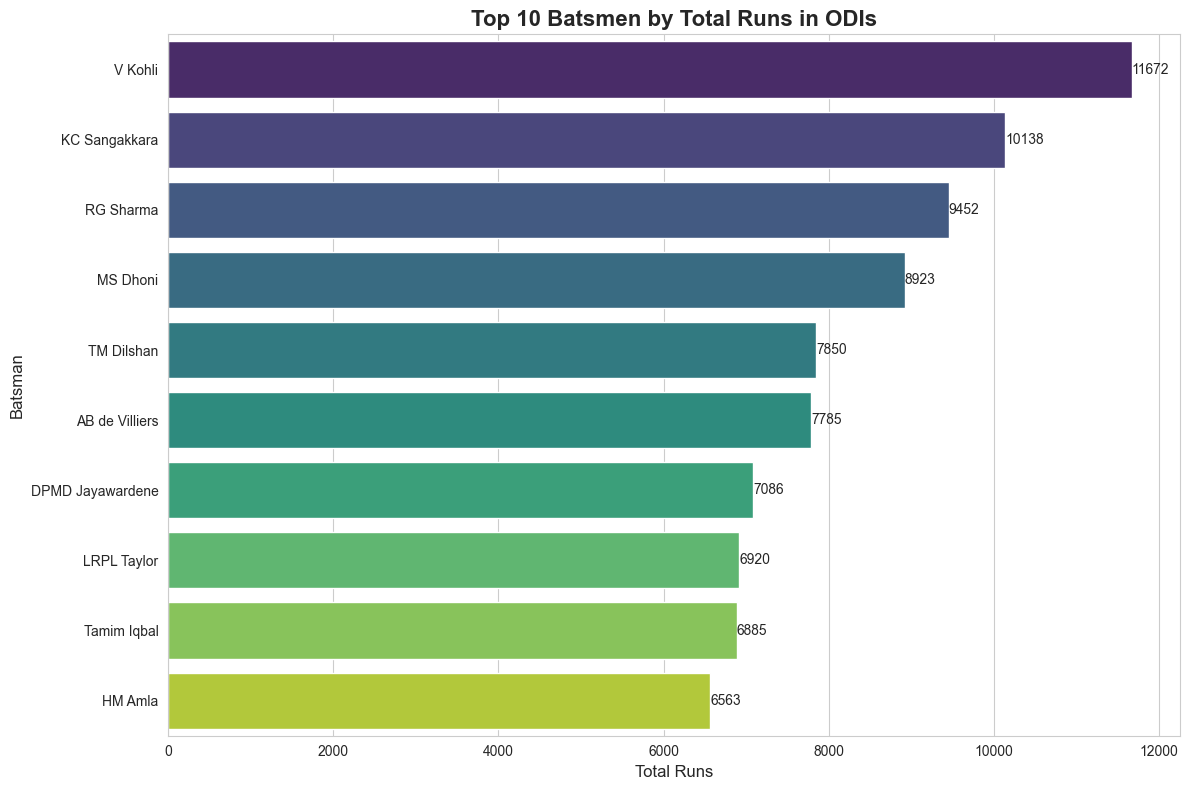

In [6]:
q1 = """
SELECT batter, SUM(runs + extras) AS total_runs FROM odi_matches
GROUP BY batter ORDER BY total_runs DESC LIMIT 10;
"""
df1 = get_data_from_db(q1)

if not df1.empty:
    plot_bar_chart(df1, x_col='total_runs', y_col='batter', title="Top 10 Batsmen by Total Runs in ODIs", x_label="Total Runs", y_label="Batsman")
else:
    print("Could not retrieve data for this plot.")


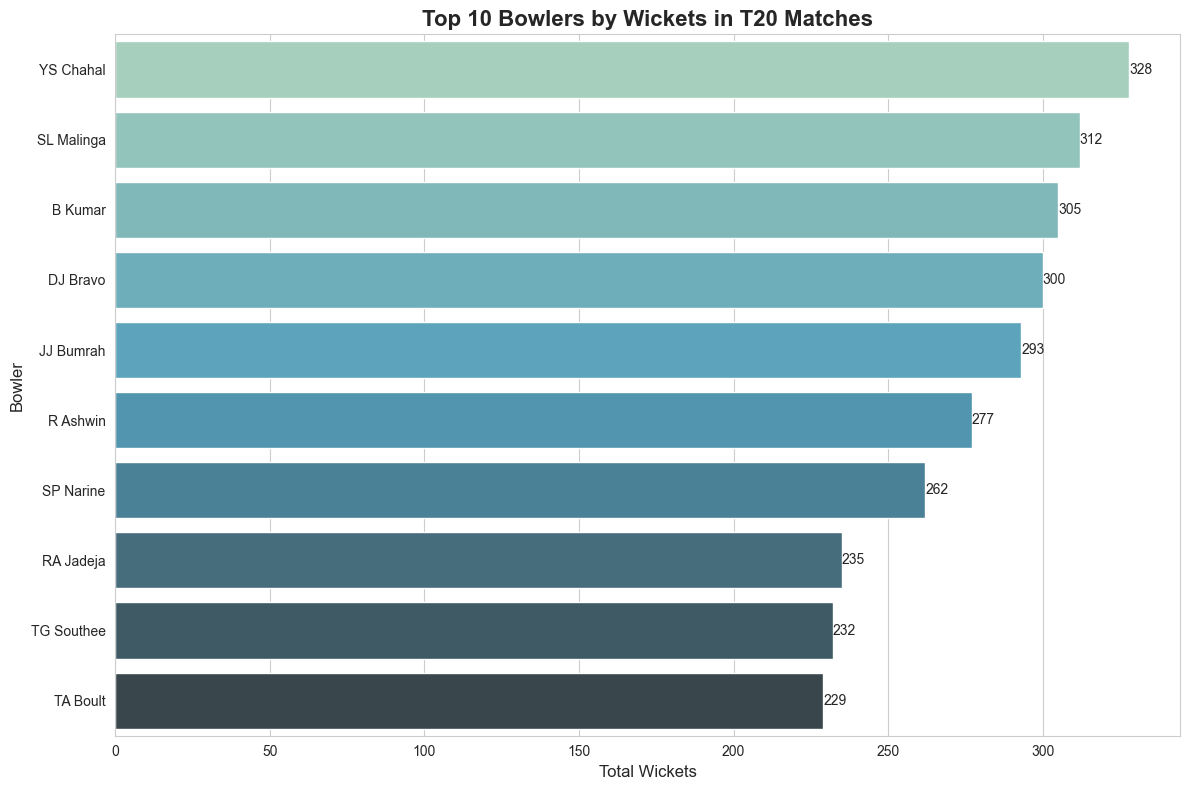

In [7]:
q2 = """
SELECT bowler, SUM(wicket) AS total_wickets FROM t20_matches
GROUP BY bowler ORDER BY total_wickets DESC LIMIT 10;
"""
df2 = get_data_from_db(q2)

if not df2.empty:
    plot_bar_chart(df2, x_col='total_wickets', y_col='bowler', title="Top 10 Bowlers by Wickets in T20 Matches", x_label="Total Wickets", y_label="Bowler", palette="GnBu_d")
else:
    print("Could not retrieve data for this plot.")


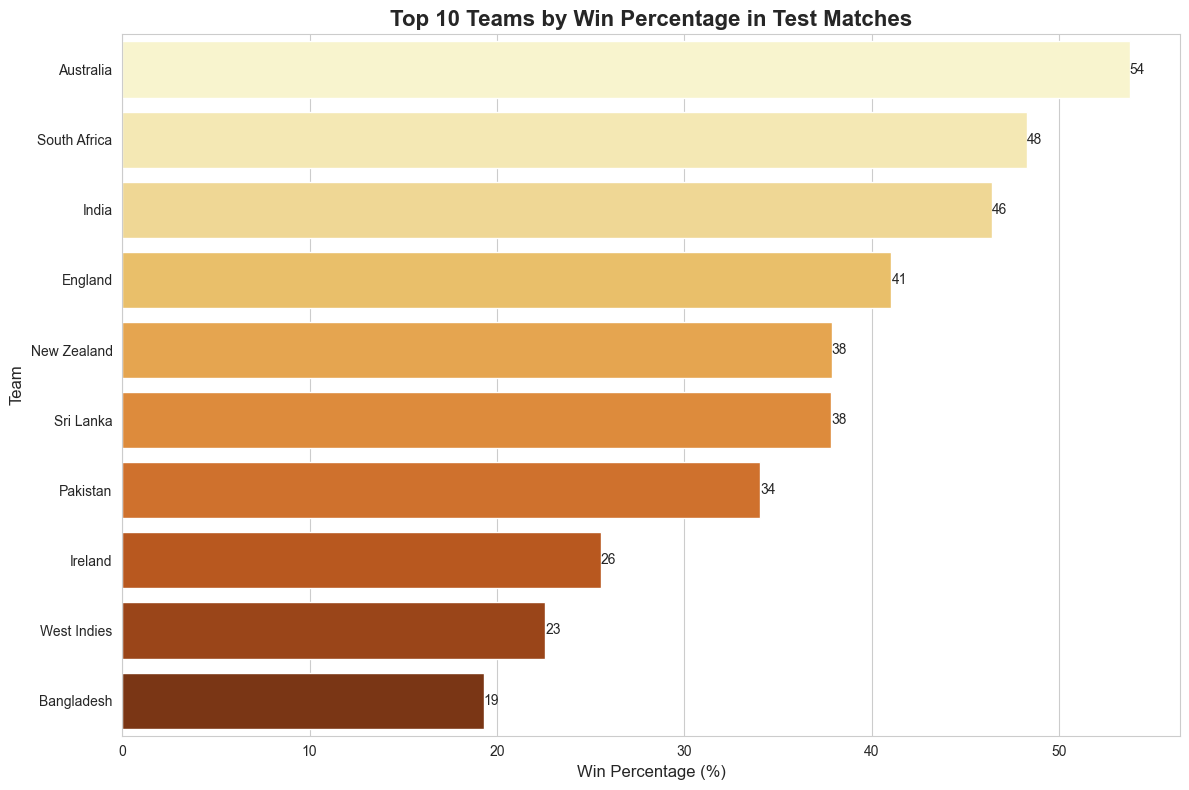

In [8]:
q3 = """
WITH TeamMatches AS (SELECT team_1 AS team FROM test_matches UNION ALL SELECT team_2 AS team FROM test_matches)
SELECT
    t1.match_winner AS team,
    COUNT(t1.match_winner) * 100.0 / (SELECT COUNT(*) FROM TeamMatches WHERE team = t1.match_winner) AS win_percentage
FROM test_matches t1
WHERE t1.match_winner != 'No result'
GROUP BY t1.match_winner ORDER BY win_percentage DESC LIMIT 10;
"""
df3 = get_data_from_db(q3)

if not df3.empty:
    plot_bar_chart(df3, x_col='win_percentage', y_col='team', title="Top 10 Teams by Win Percentage in Test Matches", x_label="Win Percentage (%)", y_label="Team", palette="YlOrBr")
else:
    print("Could not retrieve data for this plot.")


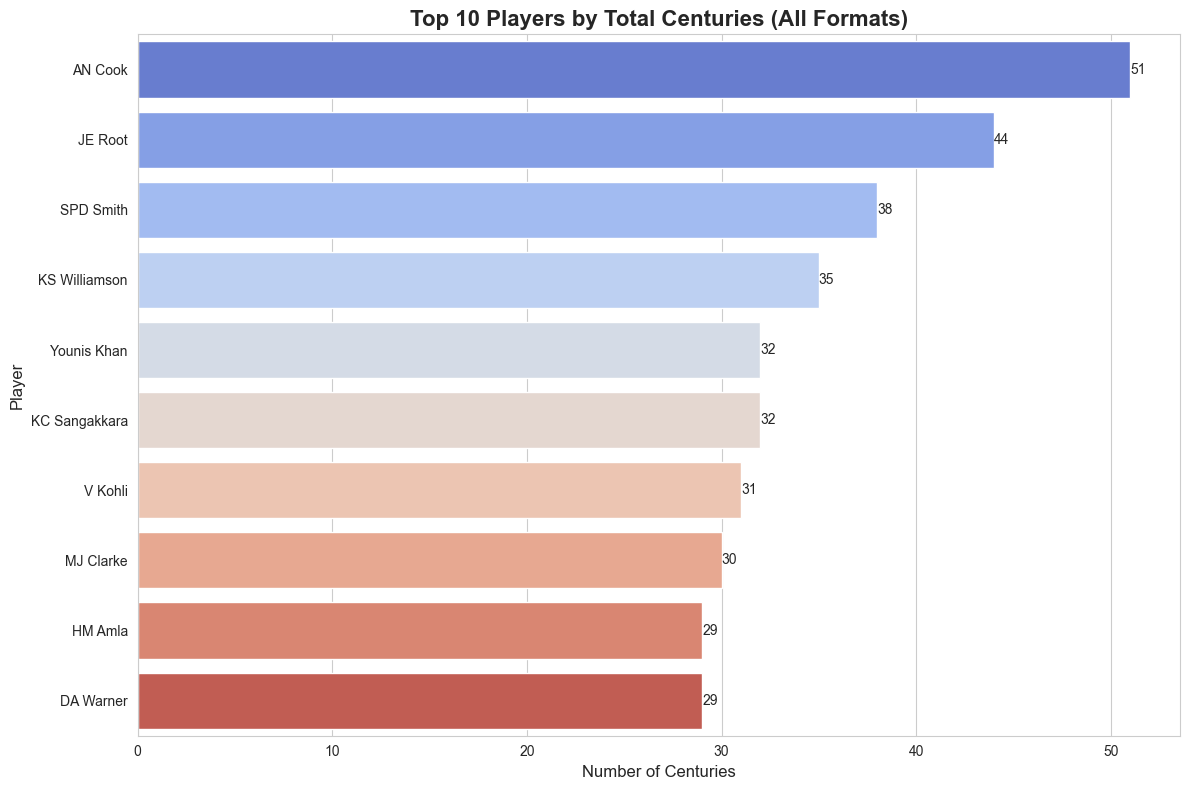

In [9]:
q4 = """
SELECT
    batter,
    COUNT(*) AS total_centuries
FROM (
    SELECT match_id, batter, SUM(runs + extras) AS total_runs FROM odi_matches GROUP BY match_id, batter HAVING total_runs >= 100
    UNION ALL
    SELECT match_id, batter, SUM(runs + extras) FROM t20_matches GROUP BY match_id, batter HAVING SUM(runs + extras) >= 100
    UNION ALL
    SELECT match_id, batter, SUM(runs + extras) FROM test_matches GROUP BY match_id, batter HAVING SUM(runs + extras) >= 100
) AS all_centuries
GROUP BY batter ORDER BY total_centuries DESC LIMIT 10;
"""
df4 = get_data_from_db(q4)

if not df4.empty:
    plot_bar_chart(df4, x_col='total_centuries', y_col='batter', title="Top 10 Players by Total Centuries (All Formats)", x_label="Number of Centuries", y_label="Player", palette="coolwarm")
else:
    print("Could not retrieve data for this plot.")


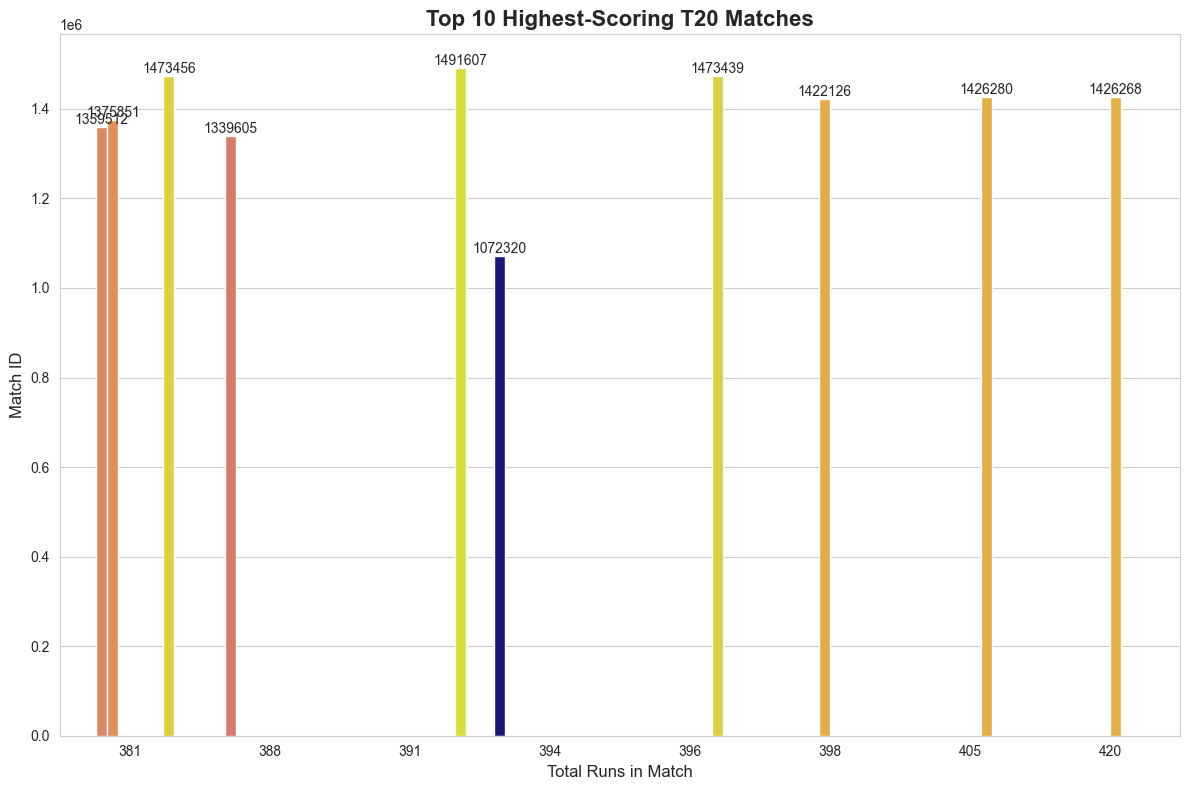

In [10]:
q5 = """
SELECT match_id, SUM(total_runs) AS total_runs_in_match FROM t20_matches
GROUP BY match_id ORDER BY total_runs_in_match DESC LIMIT 10;
"""
df5 = get_data_from_db(q5)

if not df5.empty:
    plot_bar_chart(df5, x_col='total_runs_in_match', y_col='match_id', title="Top 10 Highest-Scoring T20 Matches", x_label="Total Runs in Match", y_label="Match ID", palette="plasma")
else:
    print("Could not retrieve data for this plot.")

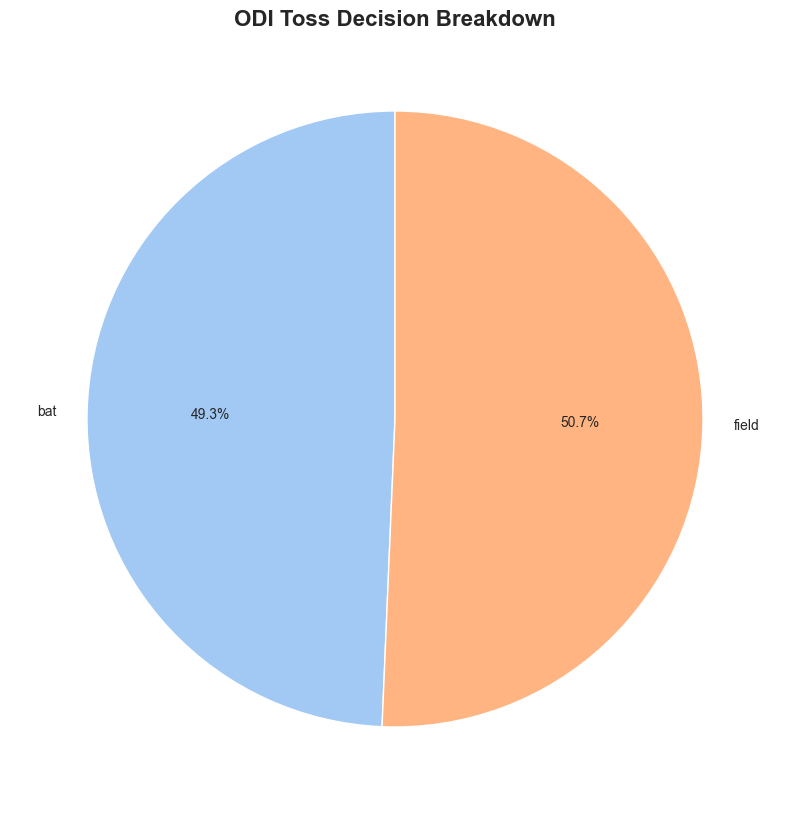

In [11]:
q6 = """
SELECT toss_decision, COUNT(DISTINCT match_id) AS total_matches
FROM odi_matches
GROUP BY toss_decision;
"""
df6 = get_data_from_db(q6)

if not df6.empty:
    plot_pie_chart(df6, labels_col='toss_decision', values_col='total_matches', title="ODI Toss Decision Breakdown")
else:
    print("Could not retrieve data for this plot.")


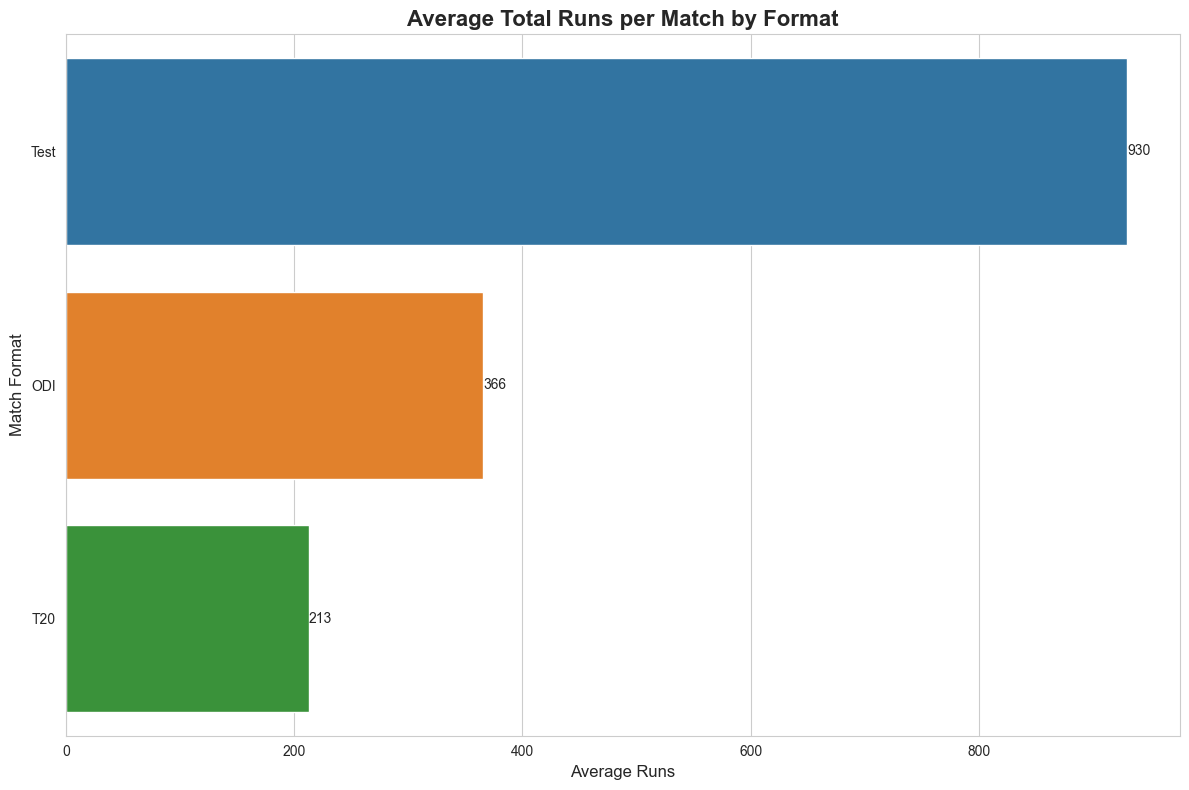

In [12]:
q7 = """
SELECT 'Test' AS match_format, AVG(total_runs_per_match) AS avg_total_runs FROM (SELECT match_id, SUM(total_runs) AS total_runs_per_match FROM test_matches GROUP BY match_id)
UNION ALL
SELECT 'ODI' AS match_format, AVG(total_runs_per_match) FROM (SELECT match_id, SUM(total_runs) AS total_runs_per_match FROM odi_matches GROUP BY match_id)
UNION ALL
SELECT 'T20' AS match_format, AVG(total_runs_per_match) FROM (SELECT match_id, SUM(total_runs) AS total_runs_per_match FROM t20_matches GROUP BY match_id);
"""
df7 = get_data_from_db(q7)

if not df7.empty:
    plot_bar_chart(df7, x_col='avg_total_runs', y_col='match_format', title="Average Total Runs per Match by Format", x_label="Average Runs", y_label="Match Format", palette="tab10")
else:
    print("Could not retrieve data for this plot.")


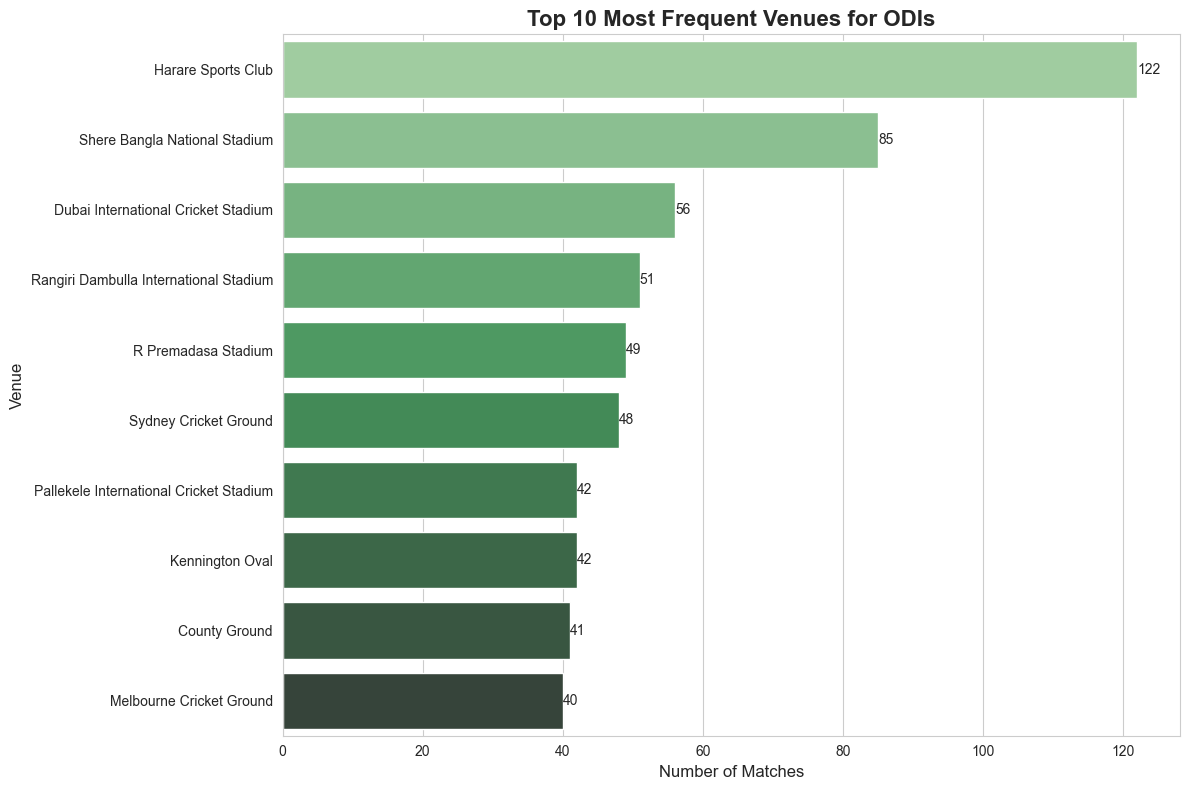

In [13]:
q8 = """
SELECT venue, COUNT(DISTINCT match_id) AS total_matches_played FROM odi_matches
GROUP BY venue ORDER BY total_matches_played DESC LIMIT 10;
"""
df8 = get_data_from_db(q8)

if not df8.empty:
    plot_bar_chart(df8, x_col='total_matches_played', y_col='venue', title="Top 10 Most Frequent Venues for ODIs", x_label="Number of Matches", y_label="Venue", palette="Greens_d")
else:
    print("Could not retrieve data for this plot.")


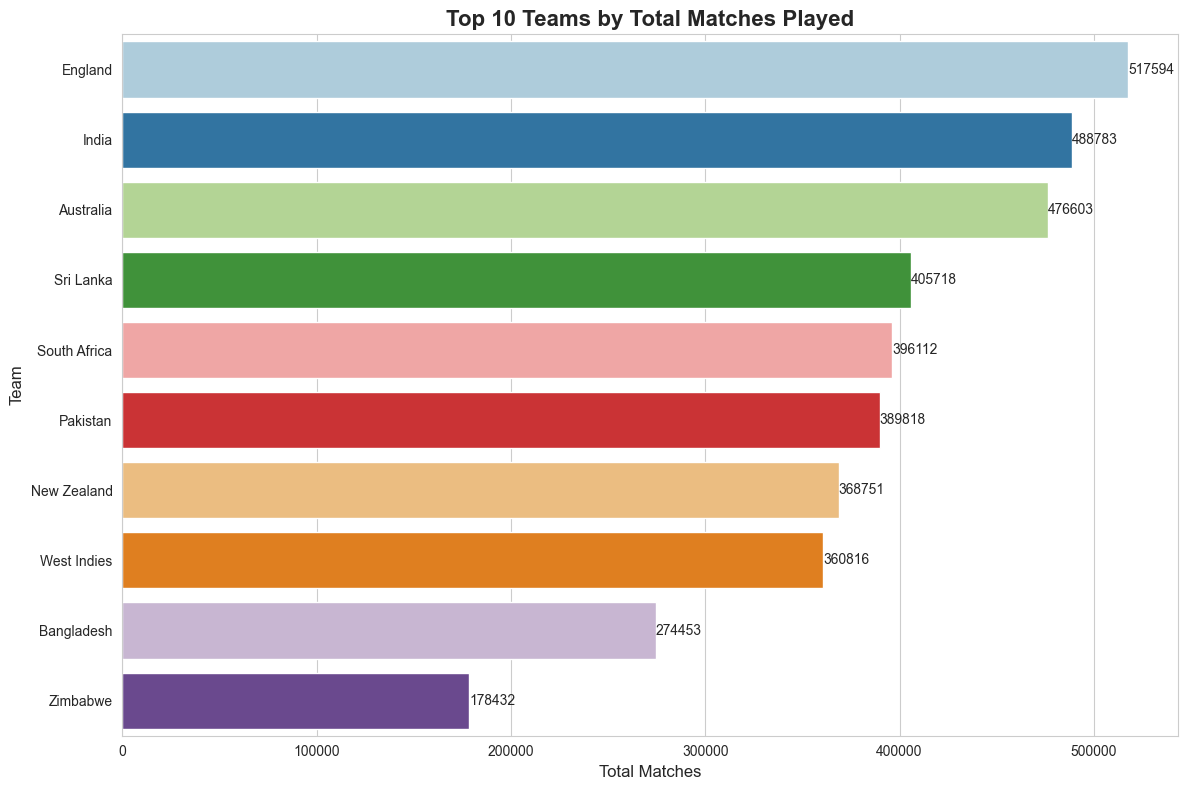

In [14]:
q9 = """
WITH AllMatches AS (
    SELECT team_1 as team FROM test_matches UNION ALL SELECT team_2 FROM test_matches
    UNION ALL
    SELECT team_1 as team FROM odi_matches UNION ALL SELECT team_2 FROM odi_matches
    UNION ALL
    SELECT team_1 as team FROM t20_matches UNION ALL SELECT team_2 FROM t20_matches
)
SELECT team, COUNT(team) AS total_matches_played FROM AllMatches
GROUP BY team ORDER BY total_matches_played DESC LIMIT 10;
"""
df9 = get_data_from_db(q9)

if not df9.empty:
    plot_bar_chart(df9, x_col='total_matches_played', y_col='team', title="Top 10 Teams by Total Matches Played", x_label="Total Matches", y_label="Team", palette="Paired")
else:
    print("Could not retrieve data for this plot.")


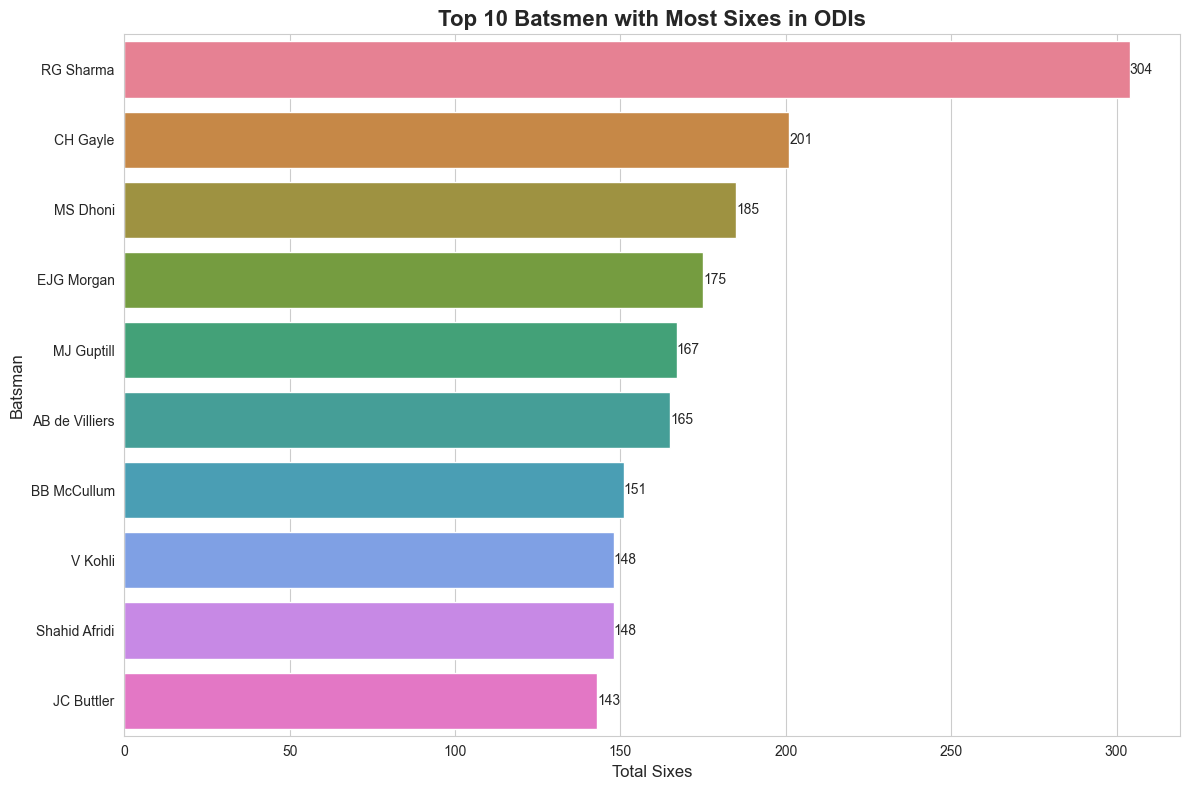

In [15]:
q10 = """
SELECT batter, COUNT(*) as total_sixes FROM odi_matches
WHERE runs = 6 GROUP BY batter ORDER BY total_sixes DESC LIMIT 10;
"""
df10 = get_data_from_db(q10)

if not df10.empty:
    plot_bar_chart(df10, x_col='total_sixes', y_col='batter', title="Top 10 Batsmen with Most Sixes in ODIs", x_label="Total Sixes", y_label="Batsman", palette="husl")
else:
    print("Could not retrieve data for this plot.")
    